In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy             as np
import xarray            as xr
import netCDF4
import yaml
import sys
import os
import pandas as pd

from   pylab             import cm
from   scipy             import ndimage
from numpy               import inf

NaN = np.nan
import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
bias = pd.read_excel('Seasonal_bias.xlsx', header=0, index_col = 0) 
RMSE = pd.read_excel('Seasonal_RMSE.xlsx', header=0, index_col = 0) 
CF   = pd.read_excel('Seasonal_CAL_CF.xlsx', header=0, index_col = 0) 
# Bias of CRCM6 & COSP2
bias_CRCM6 = np.array([bias.loc[0][1:5],bias.loc[2][1:5],bias.loc[4][1:5],bias.loc[6][1:5]])
bias_COSP2 = np.array([bias.loc[1][1:5],bias.loc[3][1:5],bias.loc[5][1:5],bias.loc[7][1:5]])
# RMSE of CRCM6 & COSP2
RMSE_CRCM6 = np.array([RMSE.loc[0][1:5],RMSE.loc[2][1:5],RMSE.loc[4][1:5],RMSE.loc[6][1:5]])
RMSE_COSP2 = np.array([RMSE.loc[1][1:5],RMSE.loc[3][1:5],RMSE.loc[5][1:5],RMSE.loc[7][1:5]])
# CF of CALIPSO
print(CF)
CAL_CF = np.array([CF.loc[0][1:5],CF.loc[1][1:5],CF.loc[2][1:5],CF.loc[3][1:5]])

  Diagnostic       DJF       MAM       JJA       SON
0      Total  0.692920  0.680844  0.722396  0.725812
1       High  0.413883  0.397079  0.427982  0.436735
2        Mid  0.285012  0.269153  0.257430  0.272961
3        Low  0.386099  0.385303  0.369957  0.388680


# PLOTTING BIAS, RMSE & CF

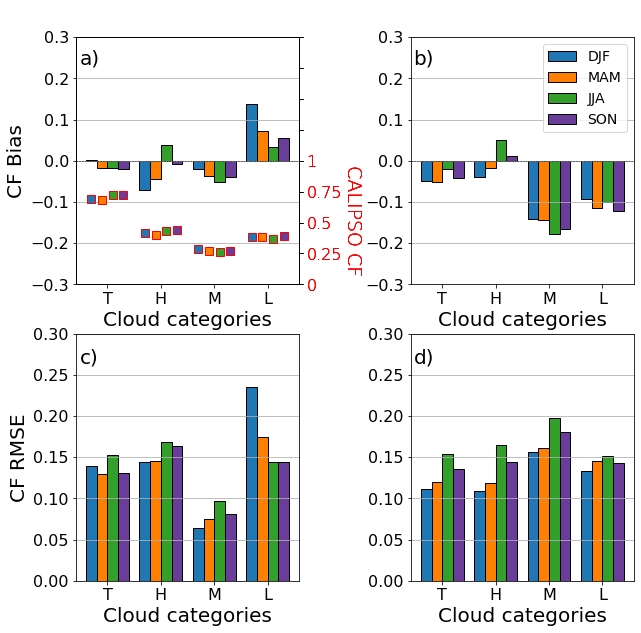

In [58]:
seasons = ['DJF', 'MAM', 'JJA', 'SON'] # Seasons
hatches = ['#1f78b4', '#ff7f00', '#33a02c', '#6a3d9a'] # colors associated with every season for color blind readers
x_ticks = ['T', 'H', 'M','L']  # x tick labels

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

bar_width = 0.2
for i, category in enumerate(seasons):

    x_positions = np.arange(len(x_ticks)) + i * bar_width
    # Bias
    ax[0,0].bar(x_positions, bias_CRCM6[:, i], width=bar_width, label=category, color=hatches[i], edgecolor = 'k')
    # CF twin ax
    ax1 = ax[0, 0].twinx()
    ax1.plot(x_positions, CAL_CF[:,i], 's',color=hatches[i], label=category, markersize = 8, markeredgecolor="red")
    ax1.set_ylim(0,2)
    ax1.set_yticks(np.arange(0,2.25,0.25))
    ax1.set_yticklabels([0,0.25,0.5,0.75,1,'','','',''], color = 'red',fontsize = 16, weight = 'light')
    ax1.annotate('CALIPSO CF', xy=(0.535, .57),
                     xycoords ='figure fraction',
                     fontsize=19, rotation = 270, color = 'r', fontweight = 'light')

    
    ax[0,1].bar(x_positions, bias_COSP2[:, i] , width=bar_width, label=category, color=hatches[i], edgecolor = 'k')
    # RMS
    ax[1,0].bar(x_positions, RMSE_CRCM6[:, i]  , width=bar_width, label=category, color=hatches[i], edgecolor='k')
    ax[1,1].bar(x_positions, RMSE_COSP2[:, i]  , width=bar_width, label=category, color=hatches[i], edgecolor='k')
    

# Set x tick positions and labels
for i in range(2):
    for j in range(2):
        if i == 1:
            ax[i,j].set_ylim(0,.3)
            ax[i,j].tick_params(axis='y', labelsize=16)

        else:
            ax[i,j].set_ylim(-0.3, 0.3)
            ax[i,j].tick_params(axis='y', labelsize=16)
        # Common to all subplots
        ax[i,j].set_xticks(np.arange(len(x_ticks)) + bar_width * (len(seasons) - 1) / 2)
        ax[i,j].set_xticklabels(x_ticks,fontsize = 16)
        ax[i,j].axhline(y = 0, color='k',linewidth = 0.5,  linestyle = '--')
        ax[i,j].grid(axis = 'y')
        ax[i,j].set_xlabel('Cloud categories', fontsize = 20)
# Add legend
ax[0,1].legend(loc = 'upper right',prop = { "size": 14 })

ax[0,0].annotate('a)', xy=(.125, .922),
                     xycoords            ='figure fraction',
                     horizontalalignment ='left',
                     verticalalignment   ='top',
                     fontsize=20)

ax[0,1].annotate('b)', xy=(.645, .922),
                     xycoords            ='figure fraction',
                     horizontalalignment ='left',
                     verticalalignment   ='top',
                     fontsize=20)

ax[1,0].annotate('c)', xy=(.125, .45),
                     xycoords            ='figure fraction',
                     horizontalalignment ='left',
                     verticalalignment   ='top',
                     fontsize=20)

ax[1,1].annotate('d)', xy=(.645, .45),
                     xycoords            ='figure fraction',
                     horizontalalignment ='left',
                     verticalalignment   ='top',
                     fontsize=20)

ax[0,0].set_ylabel('CF Bias', fontsize = 20)
ax[1,0].set_ylabel('CF RMSE' , fontsize = 20)

plt.subplots_adjust(wspace = 0.5)
plt.show()